<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Dataset-Description" data-toc-modified-id="Dataset-Description-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset Description</a></span></li><li><span><a href="#Objective" data-toc-modified-id="Objective-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objective</a></span></li></ul></li><li><span><a href="#Import-Library" data-toc-modified-id="Import-Library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Library</a></span></li><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Loading</a></span><ul class="toc-item"><li><span><a href="#Dataset-Exploration" data-toc-modified-id="Dataset-Exploration-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dataset Exploration</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Rename-Columns" data-toc-modified-id="Rename-Columns-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Rename Columns</a></span></li><li><span><a href="#Missing-Values-Handling" data-toc-modified-id="Missing-Values-Handling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Missing Values Handling</a></span></li><li><span><a href="#Drop-Column" data-toc-modified-id="Drop-Column-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Drop Column</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Visualization" data-toc-modified-id="Visualization-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Visualization</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Graded Challenge 1 Assignment by **[Fadilah Nur Imani](https://github.com/imfdlh)**

## Dataset Description

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

Header | Definition
--- | ---
`#` | ID for each pokemon
`Name` | Name of each pokemon
`Type 1` | Each pokemon has a type, this determines weakness/resistance to attacks
`Type 2` | Some pokemon are dual type and have 2
`Total` | sum of all stats that come after this, a general guide to how strong a pokemon is
`HP` | hit points, or health, defines how much damage a pokemon can withstand before fainting
`Attack` | the base modifier for normal attacks (eg. Scratch, Punch)
`Defense` | the base damage resistance against normal attacks
`SP Atk` | special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
`SP Def` | the base damage resistance against special attacks
`Speed` | determines which pokemon attacks first each round

Source: [Kaggle > pokemon](https://www.kaggle.com/abcsds/pokemon)

## Objective

Find out which Pokemons are **most resistant** against attacks between **the strongest** of each overrepresented (**most frequent type**) and underrepresented (**least frequent** type) Pokemon **Type**.

- Resistance indicator can be seen by the sum of HP, Defense, and SP Def columns.
- The total strength of Pokemon can be most represented by the Total column.

# Import Library

Import all libraries that will be used during data processing and analysis.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# change plot style
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Data Loading

Loading dataset with csv format into the notebook.

In [3]:
data = pd.read_csv('data/Pokemon.csv')

In [4]:
print(data.shape)
data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Dataset Exploration

In [5]:
print('#of row:', data.shape[0], '\n#of column:', data.shape[1])

#of row: 800 
#of column: 13


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Dataset consists of 3 different data types: integer, object/string, boolean.

---

In [7]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

This dataset has one column that contains a null value.

---

In [8]:
data.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


The statistic above shows the summarization of columns that has numerical data type.

In [9]:
data.select_dtypes(include = [object, bool]).describe().T

,count,unique,top,freq
Name,800,800,Shroomish,1
Type 1,800,18,Water,112
Type 2,414,18,Flying,97
Legendary,800,2,False,735


The statistic above shows the summarization of columns that has object and boolean data type.

# Data Cleaning

## Rename Columns

Rename column name into more readable format.

Steps:
- Rename column that contains special character,
- replace whitespace with underscore,
- and lastly set the name into uppercase form.

In [10]:
data.rename(columns = {'#': 'ID'}, inplace = True)

In [11]:
print(list(data.columns))

['ID', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [12]:
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('.', '')

In [13]:
data.columns = data.columns.str.upper()

In [14]:
print(list(data.columns))

['ID', 'NAME', 'TYPE_1', 'TYPE_2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP_ATK', 'SP_DEF', 'SPEED', 'GENERATION', 'LEGENDARY']


## Missing Values Handling

Fill in missing values or drop if the column is unnecessary.

In [15]:
data.isnull().sum()

ID              0
NAME            0
TYPE_1          0
TYPE_2        386
TOTAL           0
HP              0
ATTACK          0
DEFENSE         0
SP_ATK          0
SP_DEF          0
SPEED           0
GENERATION      0
LEGENDARY       0
dtype: int64

In [16]:
print(f"{data.isnull().sum()['TYPE_2'] * 100/ len(data)}% of TYPE_2 values are NaN.")

48.25% of TYPE_2 values are NaN.


---

Check for most frequent value (mode) of TYPE_2

In [17]:
data[['TYPE_2']].describe().T

,count,unique,top,freq
TYPE_2,414,18,Flying,97


In [18]:
data['TYPE_2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Water       14
Ice         14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: TYPE_2, dtype: int64

There are several methods to handle missing value. For categorical value, there are some methods that are common, such as: fill in with mode, create new categorical value, or even predict the value.

Based on an [article](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e) posted on towardsdatascience, fill in with mode applies for a small amount of missing value, as for the greater amount of missing value, we can create a new category to replace them.



**Solution**: Replace with new category to avoid incorrect conclusion. As for this case, we will replace the missing value with 'unknown'.

In [19]:
data['TYPE_2'].fillna('Unknown', inplace = True)

In [20]:
data['TYPE_2'].value_counts()

Unknown     386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Water        14
Ice          14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: TYPE_2, dtype: int64

Check the result:

In [21]:
data['TYPE_2'].isnull().any()

False

## Drop Column

Drop some unnecessary column.

In [22]:
data.head(1)

,ID,NAME,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


We will drop GENERATION & LEGENDARY columns because currently, we don't have any information on its definition. We also will drop TYPE_2 column since it has a great amount of Unknown value which is not helping the analysis process.

In [23]:
data.drop(columns = ['GENERATION', 'LEGENDARY', 'TYPE_2'], inplace = True)

In [24]:
data.head(1)

,ID,NAME,TYPE_1,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45


# Data Exploration

Find out which types are overrepresented.

In [25]:
# searching for overrepresented using grouping
# 1st grouping
overrepresented = data.groupby(['TYPE_1']).count()[['NAME']].sort_values(
    'NAME', ascending = False
)[:3].rename(columns = {'NAME' : 'COUNT'})
overrepresented

,COUNT
TYPE_1,
Water,112
Normal,98
Grass,70


We found the top 3 frequent TYPE_1 of Pokemon, these 3 types will be called overrepresented types.

Find out which types are underrepresented.

In [26]:
# searching for underrepresented using grouping
# 2nd grouping
underrepresented = data.groupby(['TYPE_1']).count()[['NAME']].sort_values(
    'NAME', ascending = True
)[:3].rename(columns = {'NAME' : 'COUNT'})
underrepresented

,COUNT
TYPE_1,
Flying,4
Fairy,17
Ice,24


We found the top 3 infrequent TYPE_1 of Pokemon, these 3 types will be called overrepresented types.

---

Check out the 'TOTAL' column stats of those overrepresented and underrepresented types.

In [27]:
# checking out on stats of overrepresented using query and grouping
# 3rd grouping & 1st query
overrepresented_stats = data[data['TYPE_1'].isin(list(overrepresented.index))].groupby(
    ['TYPE_1']
).agg({
    'TOTAL' : ['mean', 'median', 'max', 'min'], 'NAME' : 'count'
}).sort_values([('TOTAL', 'max'), ('NAME', 'count')], ascending = False)
overrepresented_stats

TOTAL                   NAME
              mean median  max  min count
TYPE_1                                   
Water   430.455357    455  770  200   112
Normal  401.683673    415  720  190    98
Grass   421.142857    430  630  180    70

In [28]:
# checking out on stats of overrepresented using query and grouping
# 4th grouping & 2nd query
underrepresented_stats = data[data['TYPE_1'].isin(list(underrepresented.index))].groupby(
    ['TYPE_1']
).agg({
    'TOTAL' : ['mean', 'median', 'max', 'min'], 'NAME' : 'count'
}).sort_values([('TOTAL', 'max'), ('NAME', 'count')], ascending = False)
underrepresented_stats

TOTAL                   NAME
              mean median  max  min count
TYPE_1                                   
Fairy   413.176471  405.0  680  218    17
Ice     433.458333  467.5  580  250    24
Flying  485.000000  557.5  580  245     4

---

Find the strongest Pokemon of each overrepresented type.

In [29]:
# find the strongest overrepresented type using query and groupby inside a subquery
# 5th grouping & 3rd query
overrepresented_strongest = data[
    (data['TYPE_1'].isin(list(overrepresented.index)))
    & (data['TOTAL'] == data.groupby('TYPE_1')['TOTAL'].transform('max'))
    # filter2: group by type_1 and find the max value, then insert max value of the group for each row
]
overrepresented_strongest

,ID,NAME,TYPE_1,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED
275,254,SceptileMega Sceptile,Grass,630,70,110,75,145,85,145
422,382,KyogrePrimal Kyogre,Water,770,100,150,90,180,160,90
552,493,Arceus,Normal,720,120,120,120,120,120,120


Find the strongest Pokemon of each underrepresented type.

In [30]:
# find the strongest underrepresented type using query and groupby inside a subquery
# 6th grouping & 4th query
underrepresented_strongest = data[
    (data['TYPE_1'].isin(list(underrepresented.index)))
    & (data['TOTAL'] == data.groupby('TYPE_1')['TOTAL'].transform('max'))
]
underrepresented_strongest

,ID,NAME,TYPE_1,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED
156,144,Articuno,Ice,580,90,85,100,95,125,85
397,362,GlalieMega Glalie,Ice,580,80,120,80,120,80,100
415,378,Regice,Ice,580,80,50,100,100,200,50
702,641,TornadusIncarnate Forme,Flying,580,79,115,70,125,80,111
703,641,TornadusTherian Forme,Flying,580,79,100,80,110,90,121
792,716,Xerneas,Fairy,680,126,131,95,131,98,99


---

In [31]:
# list of resistance factor
resistance_indicator = ['HP', 'DEFENSE', 'SP_DEF']

Find the most resistant Pokemon amongst the strongest of each overrepresented type:

In [32]:
resistant_over = overrepresented_strongest.copy()

In [33]:
resistant_over['RESISTANT_SCORE'] = resistant_over[resistance_indicator].sum(axis=1)

In [34]:
resistant_over.drop(columns = ['ATTACK', 'SP_ATK', 'SPEED'])

,ID,NAME,TYPE_1,TOTAL,HP,DEFENSE,SP_DEF,RESISTANT_SCORE
275,254,SceptileMega Sceptile,Grass,630,70,75,85,230
422,382,KyogrePrimal Kyogre,Water,770,100,90,160,350
552,493,Arceus,Normal,720,120,120,120,360


In [35]:
r_over_result = resistant_over.sort_values(['RESISTANT_SCORE', 'TOTAL'], ascending = False)[['ID', 'NAME', 'TYPE_1', 'RESISTANT_SCORE', 'TOTAL']][:1]
r_over_result

,ID,NAME,TYPE_1,RESISTANT_SCORE,TOTAL
552,493,Arceus,Normal,360,720


In [36]:
print(f"{r_over_result.iloc[0]['NAME']} is the most resistant of overrepresented category.")

Arceus is the most resistant of overrepresented category.


Find the most resistant Pokemon amongst the strongest of each underrepresented type:

In [37]:
resistant_under = underrepresented_strongest.copy()

In [38]:
resistant_under['RESISTANT_SCORE'] = resistant_under[resistance_indicator].sum(axis=1)

In [39]:
resistant_under.drop(columns = ['ATTACK', 'SP_ATK', 'SPEED'])

,ID,NAME,TYPE_1,TOTAL,HP,DEFENSE,SP_DEF,RESISTANT_SCORE
156,144,Articuno,Ice,580,90,100,125,315
397,362,GlalieMega Glalie,Ice,580,80,80,80,240
415,378,Regice,Ice,580,80,100,200,380
702,641,TornadusIncarnate Forme,Flying,580,79,70,80,229
703,641,TornadusTherian Forme,Flying,580,79,80,90,249
792,716,Xerneas,Fairy,680,126,95,98,319


In [40]:
r_under_result = resistant_under.sort_values(['RESISTANT_SCORE', 'TOTAL'], ascending = False)[['ID', 'NAME', 'TYPE_1', 'RESISTANT_SCORE', 'TOTAL']][:1]
r_under_result

,ID,NAME,TYPE_1,RESISTANT_SCORE,TOTAL
415,378,Regice,Ice,380,580


In [41]:
print(f"{r_under_result.iloc[0]['NAME']} is the most resistant of underrepresented category.")

Regice is the most resistant of underrepresented category.


## Visualization

Visualize TOTAL and RESISTANT SCORE to get clear picture of Pokemon.

In [42]:
to_plot = ['TOTAL', 'RESISTANT_SCORE']

Plot for overrepresented type using Pandas Plot:

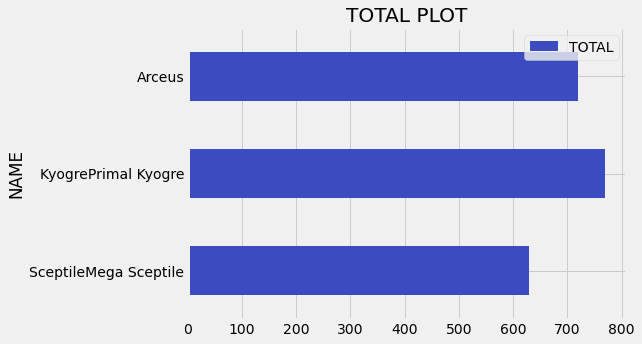

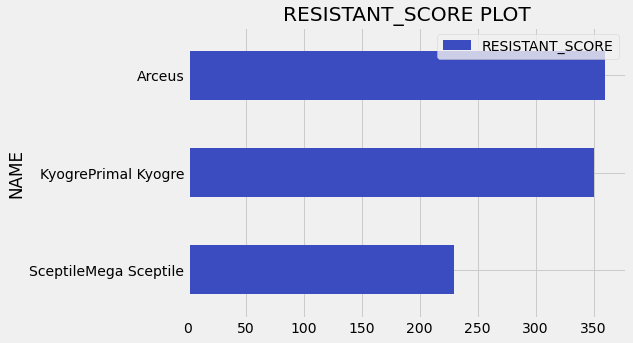

In [43]:
for i in range(len(to_plot)):
    resistant_over.plot(
        x = 'NAME', y = to_plot[i],
        kind = 'barh', figsize = (7, 5), fontsize = 14,
        title = to_plot[i] + ' PLOT', colormap = 'coolwarm'
    );

Based on the TOTAL column, KyogrePrimal Kyogre is the strongest, but if we take a look at RESISTANT_SCORE, Arceus is more resistant.

Plot for underrepresented type using Pandas Plot:

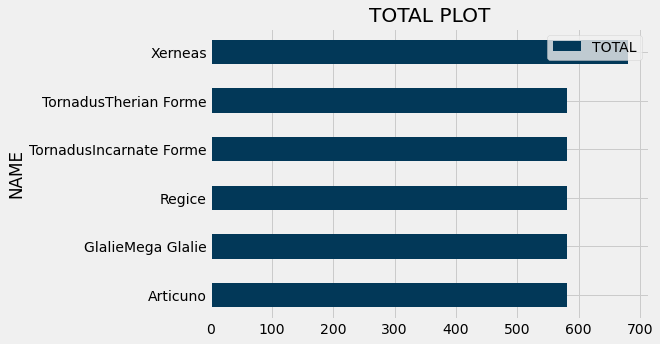

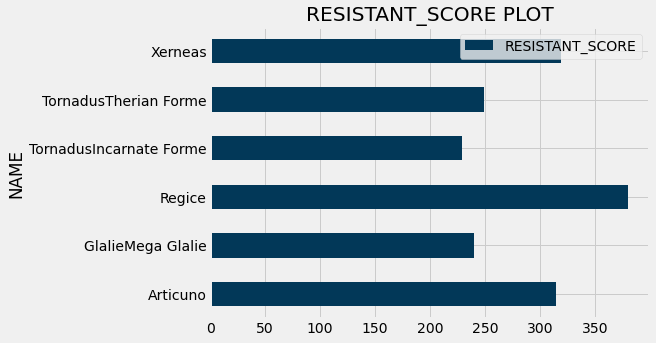

In [44]:
for i in range(len(to_plot)):
    resistant_under.plot(
        x = 'NAME', y = to_plot[i],
        kind = 'barh', figsize = (7, 5), fontsize = 14,
        title = to_plot[i] + ' PLOT', colormap = 'PuBu_r'
    );

Based on the TOTAL column, Xerneas is the strongest, but if we take a look at RESISTANT_SCORE, Regice is more resistant.

# Conclusion

We will compare analysis results and objective statements to make sure it's achieved.


***Objective***: Find out which Pokemons are **most resistant** against attacks between **the strongest** of each overrepresented (**most frequent type**) and underrepresented (**least frequent** type) Pokemon **Type**.

- Resistance indicator can be seen by the sum of HP, Defense, and SP Def columns (new column called RESISTANT_SCORE).
- The total strength of Pokemon can be most represented by the Total column.

Based on the analysis, the most resistant Pokemon for each overrepresented and underrepresented type are:

In [45]:
print(f"Overrepresented: \033[1m{r_over_result.iloc[0]['NAME']}\033[0;0m\nUnderrepresented: \033[1m{r_under_result.iloc[0]['NAME']}\033[0;0m")

Overrepresented: Arceus
Underrepresented: Regice
